In [16]:
from scipy.io import loadmat
data = loadmat(r'D:\HSI Project\Updated_Work\Paper_Model_Building_Pytorch_Notebooks\Pavia_Uni_Data\PaviaU.mat')
paviaU = data['paviaU']

data_gt = loadmat(r"D:\HSI Project\Updated_Work\Paper_Model_Building_Pytorch_Notebooks\Pavia_Uni_Data\PaviaU_gt.mat")
paviaU_gt = data_gt['paviaU_gt']

print(paviaU.shape),print(paviaU_gt.shape),

(610, 340, 103)
(610, 340)


(None, None)

In [28]:
# Number of classes in ground truth
import numpy as np
print(np.unique(paviaU_gt)) # 0 is for background

[0 1 2 3 4 5 6 7 8 9]


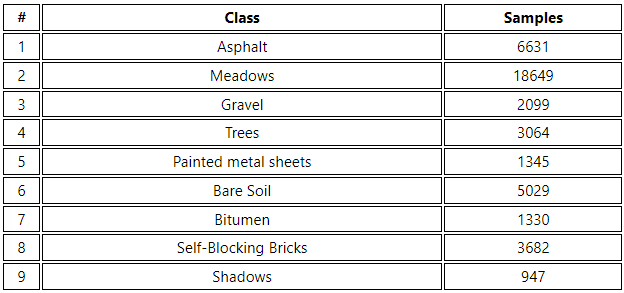

## Showing Pavia University Hyperspectral Data Cube alongside with the ground truth data

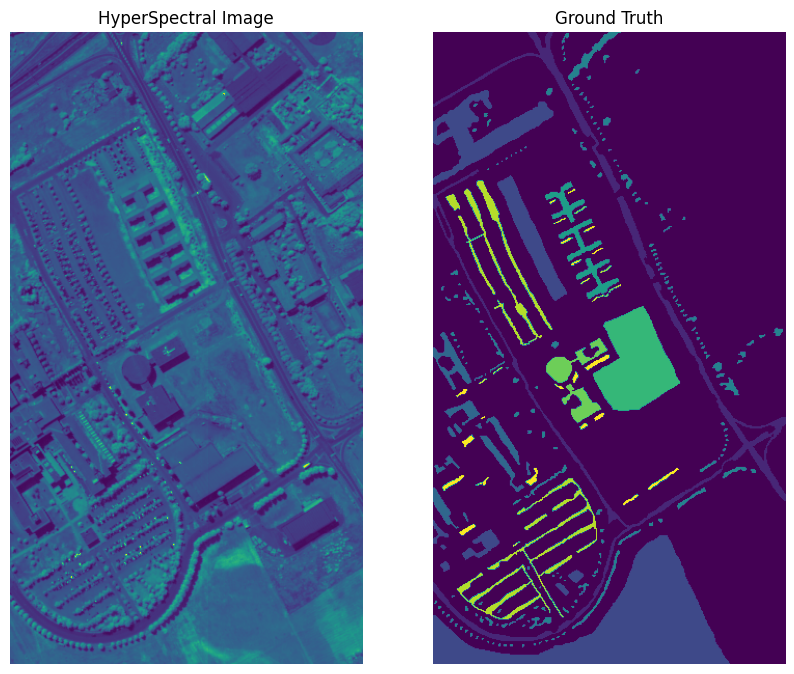

In [23]:
import numpy as np
import matplotlib.pyplot as plt
hypsp = paviaU[:,:,80].copy()  # 20 is just a random number
gt = paviaU_gt.copy()
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
ax[0].imshow(hypsp)
ax[0].set_title("HyperSpectral Image")
ax[0].axis('off')
ax[1].imshow(gt)
ax[1].set_title("Ground Truth")
ax[1].axis('off')
plt.show()

## Building Dataset for Pavia University with n x n neighbourhood kenels

In [36]:
import torch.nn.functional as F
import torch
k = 9
x = torch.tensor(np.array(paviaU.copy(),dtype=np.float32))
x = x.unsqueeze(0).permute(0,3,1,2)
print(x.shape)
padding = [k//2,k//2,k//2,k//2]
padd = F.pad(x,padding)
print(padd.shape)
paviaU_data = {}
for i in range(10):
    paviaU_data[f"label_{i}"] = []
for i in range(x.shape[2]):
    for j in range(x.shape[3]):
        temp = padd[:,:,i:i+k//2+k//2+1,j:j+k//2+k//2+1]
        label = paviaU_gt[i,j]
        paviaU_data[f"label_{label}"].append(temp)

torch.Size([1, 103, 610, 340])
torch.Size([1, 103, 618, 348])


In [37]:
for key in paviaU_data:
    print(key," ",len(paviaU_data[key]))

label_0   164624
label_1   6631
label_2   18649
label_3   2099
label_4   3064
label_5   1345
label_6   5029
label_7   1330
label_8   3682
label_9   947


In [38]:
paviaU_data["label_1"][0].shape

torch.Size([1, 103, 9, 9])